## Plotly exploration
Learning how to visualize data in plotly and recreating familiar seaborn/matplotlib plots as interactive plotly figures.

In [1]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np
import plotly

In [2]:
#set to notebook for interactive plots
#set to png to render plots on github
pio.renderers.default = 'png'
plotly.__version__

'4.3.0'

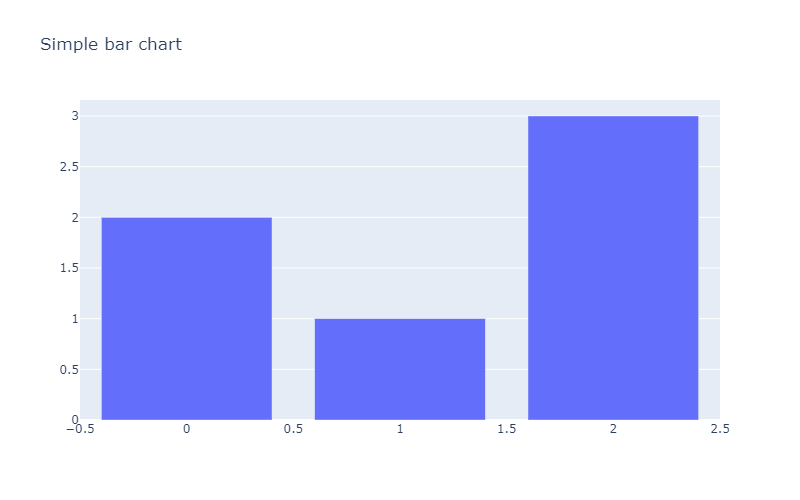

In [3]:
fig = go.Figure(
    data = [go.Bar(y = [2, 1, 3])],
    layout_title_text = "Simple bar chart"
)
#can change renderer on the fly during fig.show()
fig.show(renderer="png", width=800, height=500)

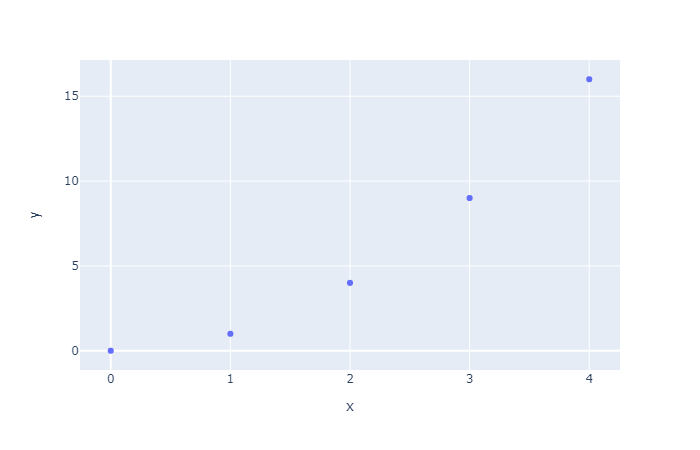

In [4]:
fig = px.scatter(x=[0, 1, 2, 3, 4], 
                 y=[0, 1, 4, 9, 16])
fig

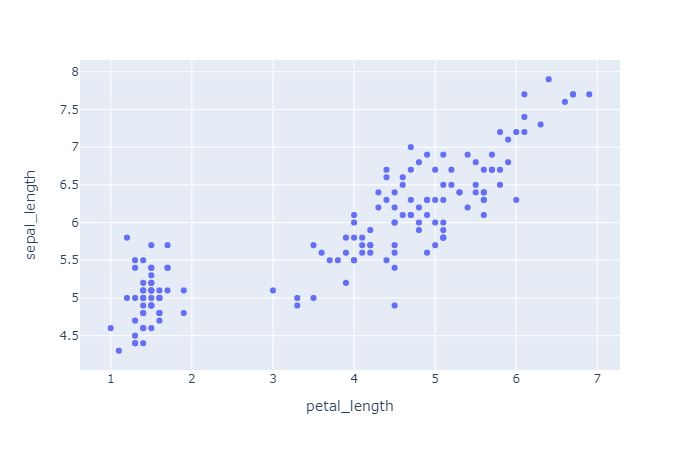

In [5]:
iris = px.data.iris()
fig = px.scatter(iris,
                 x="petal_length",
                 y="sepal_length")
fig

In [6]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1


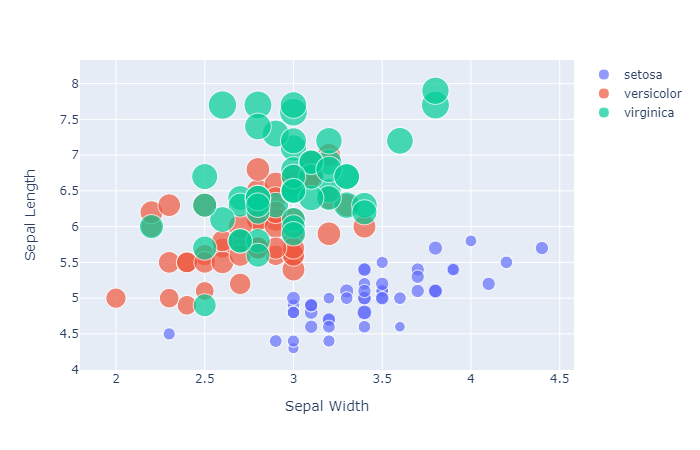

In [7]:
fig = px.scatter(iris, 
                 x          ="sepal_width",
                 y          ="sepal_length",
                 color      ="species",
                 size       ='petal_length',
                 labels={'sepal_width':'Sepal Width',
                         'sepal_length':'Sepal Length'},
                 hover_data =['petal_width'])\
                .for_each_trace(lambda t: t.update(name=t.name.replace("species=","")))


fig.show()

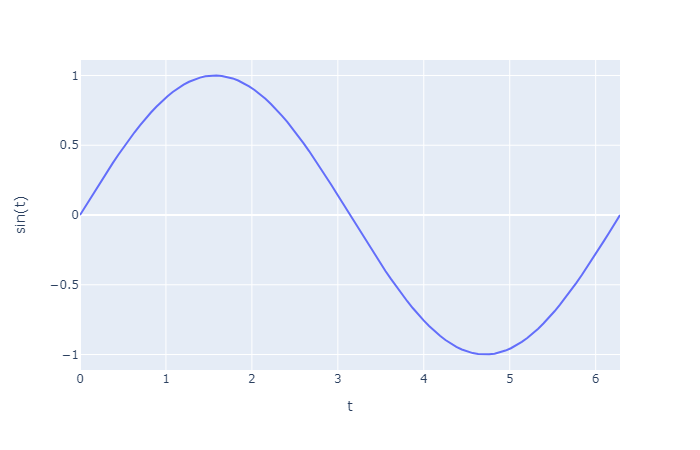

In [8]:
t = np.linspace(0, 2*np.pi, 100)

fig = px.line(x=t, y=np.sin(t), labels={'x':'t', 'y':'sin(t)'})
fig.show()

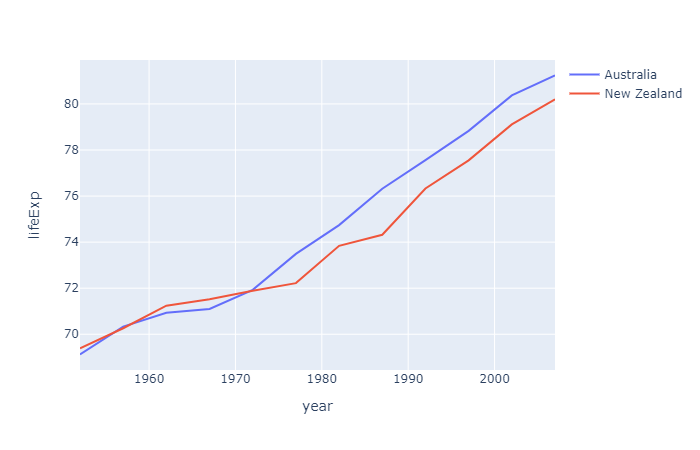

In [9]:
gapminder = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(gapminder,
              x          ="year",
              y          ="lifeExp",
              color      ="country",
              hover_data =['pop', 'gdpPercap'])\
              .for_each_trace(lambda t: t.update(name=t.name.replace("country=","")))
fig